# Data Science Challenge of the Day

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Sept 23 - Using Python, create a line chart with both the daily and 7-day moving average for the close price for Apple stock.

#### Read-In Data 
Source: Yahoo Finance

In [2]:
aapl = pd.read_csv('./data/AAPL.csv')

#### Set Date as Index and Sort

In [5]:
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl.set_index('Date', inplace = True)
aapl.sort_index(inplace = True)

#### Define Rolling Averages

In [22]:
daily_average = aapl.rolling(window = 1).mean()
weekly_average = aapl.rolling(window = 7).mean()

#### Plot Close Prices

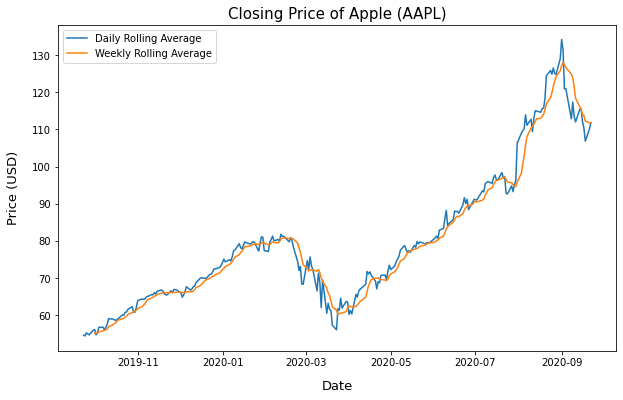

In [31]:
plt.figure(figsize = (10, 6))
plt.plot(daily_average['Close'], label = 'Daily Rolling Average')
plt.plot(weekly_average['Close'], label = 'Weekly Rolling Average')
plt.title('Closing Price of Apple (AAPL)', fontdict = {'fontsize':15})
plt.xlabel('Date', fontdict = {'fontsize':13}, labelpad = 12)
plt.ylabel('Price (USD)', fontdict = {'fontsize':13}, labelpad = 12)
plt.legend();